In [2]:
#@title 
class Weights:# To be trained
    def __init__(self):
        # for playing
        self.w_1 = 6  # length 3 with 1 open end 
        self.w_2 = 100 # length 3 with 2 open ends
        self.w_3 = 10  # length 2 with 1 open end
        self.w_4 = 50  # length 2 with 2 open ends---->attack
        self.w_5 = 1  # length 1 with 1 open end
        self.w_6 = 2  # length 1 with 2 open ends

        # for training
        self.fitness = 0 # evaluation
        self.win = 0 # number of winning games

In [3]:
#@title
# We found the base for this code online (URL is below)
# https://www.geeksforgeeks.org/search-a-word-in-a-2d-grid-of-characters/
# Note however, that we changed the code quite a bit to fit our needs

# This program searches for a given chain in the board

class Pattern: 
	
	def __init__(self): 
		self.R = None
		self.C = None
		self.dir = [[-1, 0],   # upwards vertically
		            [1, 0],    # downwards vertically 
		            [1, 1],    # downwards diagonally to the right
		            [1, -1],   # downwards diagonally to the left
		            [-1, -1],  # upwards diagonally to the left
		            [-1, 1],   # upwards diagonally to the right
		            [0, 1],    # left horizontally 
		            [0, -1]]   # right horizontally 		
		
		
	# the search function searches all 8 directions for a chain in the board at location (row, col)  
	def search(self, board, row, col, chain, full_search): 
		number_chains = 0
		direction_x = 2
		direction_y = 2
		found = False 
		direction = [0,0]
		# if first character doesn't match, stop
		if board[row][col] != chain[0]: 
			return 2, 2, False, 0
			#return direction_x, direction_y, found, number_chains
			
		# search all 8 directions 
		for x, y in self.dir: 
			
			row_next, col_next = row + x, col + y 
			flag = True
			
			# first character checked, match rest of chain 
			for k in range(1, len(chain)): 
				
				if (0 <= row_next < self.R and 0 <= col_next < self.C and chain[k] == board[row_next][col_next]): 
					# move in particular direction 
					row_next += x 
					col_next += y 
				else: 
					# if out of bound or no match found, break
					flag = False
					break
			
			if flag: 
				if full_search == False: return x, y, True, 1
				
				flag = False 
				found = True 
				direction_x = x
				direction_y = y 
				number_chains += 1
				
		return direction_x, direction_y, found, number_chains
	
	
	# patternSearch function searches for the first instance of the chain in the entire board	
	def patternSearch(self, board, chain, search_full_board): 
		
		self.R = len(board) 
		self.C = len(board[0]) 
		
		# iterate through the board until we find the first instance of the chain 
		if not search_full_board:
			for row in range(self.R): 
				for col in range(self.C): 
					x_dir, y_dir, found, num_chains = self.search(board, row, col, chain, search_full_board)
					if found: 
						chain_locations = [[row,col]]
						for _ in range(len(chain)-1):
							row += x_dir
							col += y_dir
							chain_locations.append([row,col])
						return chain_locations, True, 0
			return [], False, 0
		
		# iterate through every cell in board to search for all instances of the chain 
		else:
			counter = 0
			for row in range(self.R): 
				for col in range(self.C): 
					x_dir, y_dir, found, num_chains = self.search(board, row, col, chain, search_full_board)
					if found: counter += num_chains
			return [], counter>0, counter//2 

In [4]:
#@title
player_1 = 'x'
player_2 = 'o'

def compare_weights(weights_x, weights_o):
    
    # initialize variables
    row = 15
    col = 15
    x_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 'p']
    y_labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14', '15']
    pattern = Pattern()

    # set up the starting conditions
    game_continue = True
    current_player = player_1 # TODO - first player chosen randomly 
    current_board_state = create_board(row,col)
   
    # play game
    weights = Weights()
    while game_continue:
        current_board_state, current_player = alternate_moves(current_board_state, current_player, x_labels, weights_x, weights_o)
        
        isWin, winner =   found_winner(pattern, current_board_state)
        
        if isWin:
            game_continue = False

    return current_board_state, winner 

In [5]:
#@title
import numpy as np
'''
Apply human knowledge to strength the player and save runtime. 
'''
class Opening:
    def __init__(self, player, opponent):
        self.player = player
        self.opponent = opponent 

    def defence(self,board):
        count = 0
        for i in range(15):
            for j in range (15):
                if board[i][j] == self.opponent: # opponent, remove hard coded values
                    count += 1
        if count < 3 and count >= 0:
            return count

    #Attack
    def first_move(self,board):# check whether the board is empty
        count = 0
        for i in range(15):
            for j in range (15):
                if board[i][j] == self.opponent or board[i][j] == self.player:
                    count += 1
        if count == 0:
            return True # always place the stone in the middle (8h) Best_move & Best_runtime
        return False 

    def second_move_diagonal(self,board):#check whether the opponent put a stone in the diagonal directions
        if (board[7][7] + board[7][9] + board[9][7] + board[9][9]) != '....':
            return True

    def second_move_horizontal(self,board):#check whether the opponent put a stone in the horizontal directions
        if (board[7][8] + board[8][7] + board[8][9] + board[9][8]) != '....':
            return True

class MustBlock:
    def __init__(self):
        self.player_1 = [['.x.xx.','.xxx..'],['.oooo', 'o.ooo', 'oo.oo', '.o.oo.', '.ooo..']]
        self.player_2 = [['.o.oo.','.ooo..'],['.xxxx', 'x.xxx', 'xx.xx', '.x.xx.', '.xxx..']]

class Winning:
    def __init__(self):
        self.player_1 = ['.xxxx', 'x.xxx', 'xx.xx']
        self.player_2 = ['.oooo', 'o.ooo', 'oo.oo']

class Other:
    def __init__(self):
        pass

In [6]:
#@title

# Gomoku Player
# CMPUT 355 Assignment 4
# Group Name: ???


import copy, pandas, random, time

player_1 = 'x'
player_2 = 'o'


# INPUT:  row and column dimensions
# OUTPUT: returns 2D board matrix
def create_board(row,col):
    board = np.full((row, col), '.')
    return board


# INPUT:  row and column dimensions
# OUTPUT: returns 2D weight matrix
def create_weight_matrix(row,col):
    weights = np.full((row, col), 0)
    return weights


# INPUT:  2D board matrix and the x and y axis labels
# OUTPUT: prints board
def display(board, x_labels, y_labels):
    print(pandas.DataFrame(board, columns=x_labels, index=y_labels))


# INPUT:  2D board matrix and the pattern_finder object
# OUTPUT: returns True if one of the players won
def found_winner(pattern, board):
    _, x_winner, _ = pattern.patternSearch(board, 'xxxxx', False)
    _, o_winner, _ = pattern.patternSearch(board, 'ooooo', False)
    
    if x_winner:
        return x_winner, player_1
    elif o_winner:
        return o_winner, player_2
    
    return False, ""


# INPUT:  the x labels and the row size
# OUTPUT: the row and column for the human players' next move
def get_user_next_move(board, x_labels, row_size):
    valid = False
    while not valid:
        col = input("Choose a column: ").lower()
        row = input("Choose a row: ")

        if (col in x_labels) and (row.isdigit()) and (int(row) <= row_size) and (int(row) >= 1) and (is_legal(board, [int(row)-1, x_labels.index(col)])):
            valid = True
        else:
            print("You chose an invalid location, choose again.")

    return int(row)-1, x_labels.index(col)


# INPUT:  2D board matrix, cell location
# OUTPUT: returns True if that cell is empty (i.e. a move can be made)
def is_legal(board, cell):
    if (cell != None) and (cell[0] <= len(board)) and (cell[1] <= len(board[0])) and (cell[0] >= 0) and (cell[1] >= 0):
        return board[cell[0], cell[1]] == "."
    return False


# INPUT:  2D board matrix, current player, the x labels, and the pattern_finder object
# OUTPUT: the new state of the board and the next player
def alternate_moves(board, player, x_labels, weights_x, weights_o):
    
    pattern = Pattern()

    if player == player_1:  
        
        
        ## when both players are computers something goes wrong TODO- fix bug 
        ## comment out these 2 lines out if we want the computer to play itself 
        #row, col = get_user_next_move(board, x_labels, len(board[0]))
        #board[row][col] = player_1
        
        ## uncomment these 3 lines if we want the computer to play iteself
        opponent = player_2
        move = computer_player(board, pattern, player, opponent, weights_x, weights_o)
        board[move[0]][move[1]] = player_1        
        
        next_player = player_2

    elif player == player_2:
        opponent = player_1
        move = computer_player(board, pattern, player, opponent, weights_x, weights_o)
        board[move[0]][move[1]] = player_2
        next_player = player_1

    return board, next_player


# INPUT:  2D board matrix and the pattern_finder object
# OUTPUT: returns the location of the next move
def computer_player(board, pattern, player, opponent, weights_x, weights_o):

    start_time = time.time()

    op = Opening(player, opponent)
    bk = MustBlock()
    
    # 1. check opening moves 
    
    #  first move
    if op.first_move(board):
        move = [7,7]
        return move
    
    # second move
    if op.defence(board) == 1:
        for i in range(15):
            for j in range(15):
                if board[i][j] == opponent:   
                    #move = [i+1,j] #up
                    move = [i-1,j+1] #diag
                    return move
    # third move
    elif op.defence(board) == 2:
        for i in range(15):
            for j in range(15):
                if board[i][j] == opponent:   
                    if is_legal(board, [i+1, j+1]):
                        move = [i+1,j+1]
                        return move

    # 2. check winning moves
    move = check_winning_move(board, pattern, player)

    # 3. check defensive moves
    if move == None: 
        move = get_defensive_move(board, pattern, player)

    # 4. check must-block case moves
    if move == None:
        if player == player_1: block = bk.player_1[0]
        elif player == player_2: block = bk.player_2[0]
        move = get_chain_location(pattern, board, block)

    # 5. make move based on trained weights 
    if move == None:

        board_weights = assign_weights(board, player, opponent, weights_x, weights_o)
        move = max_move(board_weights, board)        

    #print("Computer chose row "+ str(move[0]) + " and column " + str(move[1]))
    #print("Computer took", str(time.time() - start_time), "to make a move")

    return move


# INPUT:  2D board matrix, chain_locations
# OUTPUT: returns the location of the next move
def get_empty_cell(board, chain_locations):
    for location in chain_locations:
        if board[location[0], location[1]] == ".":
            return location
    return [-1,-1]

# INPUT:  2D board matrix, the pattern_finder object, and a list of chain locations to search through
# OUTPUT: returns the location of the empty cell in the chain if it exists
def get_chain_location(pattern, board, chains):
    for chain in chains:
        chain_locations, found, num_chains = pattern.patternSearch(board, chain, False)
        if found:
            loc = get_empty_cell(board, chain_locations)
            break
    if not found: loc = None
    if not is_legal(board, loc): loc = None 
    return loc


# INPUT:  2D board matrix and the pattern_finder object
# OUTPUT: returns the location of the next move
def check_winning_move(board, pattern, player):
    wn = Winning()
    if player == player_1: winning_moves = wn.player_1
    elif player == player_2: winning_moves = wn.player_2
    return get_chain_location(pattern, board, winning_moves)


# INPUT:  2D board matrix and the pattern_finder object
# OUTPUT: returns the location of the next best defensive move if it exists
def get_defensive_move(board, pattern, player):
    bk = MustBlock()
    if player == player_1: defensive_cells = bk.player_1[1]
    elif player == player_2: defensive_cells = bk.player_2[1]
    return get_chain_location(pattern, board, defensive_cells)


# INPUT:  2D board matrix (matrix)
# OUTPUT: board_weights (matrix) with the weights filled in
def assign_weights(board, player, opponent, w_x, w_o):   # TODO- clean this fxn 
    
    # TODO- check hr around latest move only 
    
    board_weights = create_weight_matrix(len(board),len(board[0]))
    
    # commented so that find_winner() in GA.py can send a weight class
    #w = Weights()
    
    Wx = np.array([w_x.w_1, w_x.w_2, w_x.w_3, w_x.w_4, w_x.w_5, w_x.w_6])
    Wo = np.array([w_o.w_1, w_o.w_2, w_o.w_3, w_o.w_4, w_o.w_5, w_o.w_6])
        
    for row in range(0, board_weights.shape[0]):
        for col in range(0, board_weights.shape[1]): 
            if is_legal(board, [row, col]):
                temp_board = copy.deepcopy(board)
                temp_board[row, col] = player 
                
                # player o 
                features_1, features_2 = check_chain_length(3,  temp_board, row, col, player)
                features_3, features_4 = check_chain_length(2,  temp_board, row, col, player)
                features_5, features_6 = check_chain_length(1,  temp_board, row, col, player)
                
                features = np.array([features_1, features_2,
                                     features_3, features_4,
                                     features_5, features_6])
                heuristic_o = np.dot(features, Wo)
                
                
                # player x
                features_1, features_2 = check_chain_length(3,  temp_board, row, col, opponent)
                features_3, features_4 = check_chain_length(2,  temp_board, row, col, opponent)
                features_5, features_6 = check_chain_length(1,  temp_board, row, col, opponent)
                
                features = np.array([features_1, features_2,
                                     features_3, features_4,
                                     features_5, features_6])
                heuristic_x = np.dot(features, Wx)
                
                board_weights[row][col] = heuristic_o - heuristic_x # fraction of x?
                
            elif not is_legal(board, [row, col]): 
                board_weights[row, col] = -1000000 # TODO - set to None
   
    return board_weights


# INPUT: the length of the chain to check, the location (x, y), and the current player
# OUTPUT: the number of chains of length n with 1 and 2 open ends 
def check_chain_length(n, board, x, y, player):
    board_subset = get_board_subset(board, x, y, (5,5))
    
    match = ""
    for _ in range(n):
        match += player
    match_2end = "." + match + "."
    match_1end = "." + match
    pattern = Pattern()
    if board_subset.shape[0] == 0 or board_subset.shape[1] == 0: board_subset = board
    _, _, num_chains_1_open_end = pattern.patternSearch(board_subset, match_1end, True)
    _, _, num_chains_2_open_ends = pattern.patternSearch(board_subset, match_2end, True)
    return num_chains_1_open_end, num_chains_2_open_ends


# INPUT: the board and its desired shape (surrounding locations x,y)
# OUTPUT: returns a subset of the board
def get_board_subset(board, x, y, new_shape):
    cropped_board = board[x - new_shape[0] - 1 : x + new_shape[0], y - new_shape[1] - 1 : y + new_shape[1]]
    return cropped_board


# INPUT:  2D board weight matrix
# OUTPUT: returns the location of the best offensive move 
def max_move(board_weights, board):

    max = board_weights.max()
    max_moves = []
    count = 0
    array_count = -1
    item_count = -1
    for array in board_weights:
        array_count += 1
        for item in array:
            item_count += 1
            if item_count > 15:
                item_count = item_count % 15
            if item == max and is_legal(board, [array_count, item_count ]):
                count += 1
                move = (array_count, item_count)
                max_moves.append(move)

    random_number = random.randint(0, count-1)
    random_max = max_moves[random_number]

    return random_max 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18251772846185363151
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15923480432701195753
physical_device_desc: "device: XLA_CPU device"
]
Training...


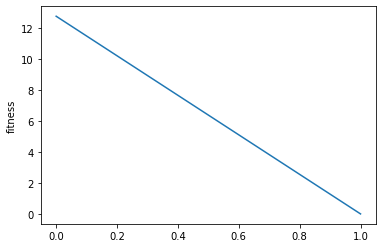

The best weights so far: 8 15 6 12 4 1
End of generation 1----------------------------------------------------------
Training...


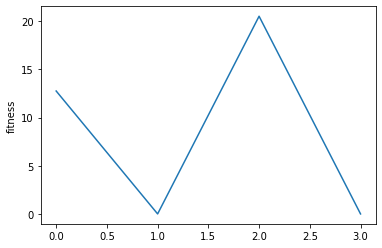

The best weights so far: 8.1 15.3 1.7 12.25 0.02 1.12


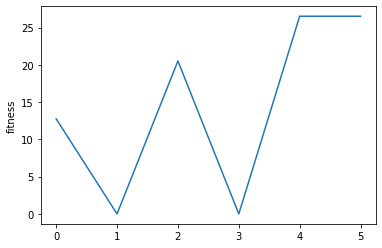

The best weights so far: 8.1 15.3 1.7 12.25 0.02 1.12


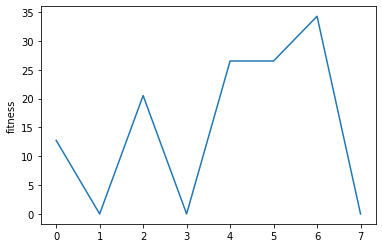

The best weights so far: 8.1 15.3 1.7 12.25 0.02 1.12


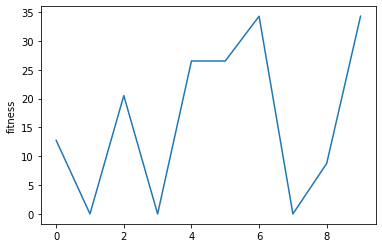

The best weights so far: 8.1 15.3 1.7 12.25 0.02 1.12


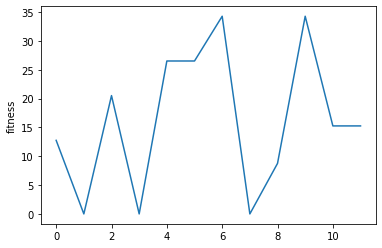

The best weights so far: 8.1 15.3 1.7 12.25 0.02 1.12


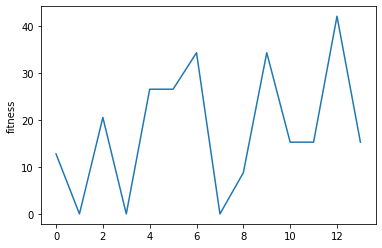

The best weights so far: 8.1 15.3 1.7 12.25 0.02 1.12
End of generation 2----------------------------------------------------------
Training...


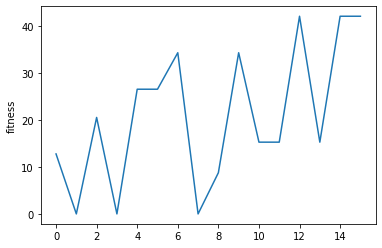

The best weights so far: 8.299999999999999 15.900000000000002 3.0999999999999996 12.75 0.06 1.3600000000000003


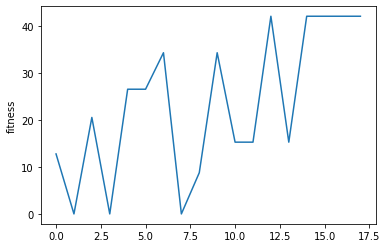

The best weights so far: 8.299999999999999 15.900000000000002 3.0999999999999996 12.75 0.06 1.3600000000000003


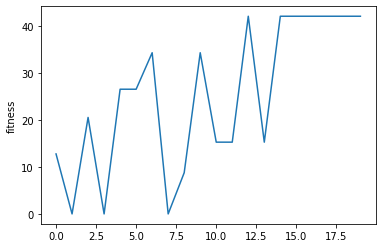

The best weights so far: 8.299999999999999 15.900000000000002 3.0999999999999996 12.75 0.06 1.3600000000000003


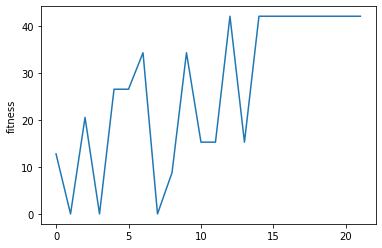

The best weights so far: 8.299999999999999 15.900000000000002 3.0999999999999996 12.75 0.06 1.3600000000000003


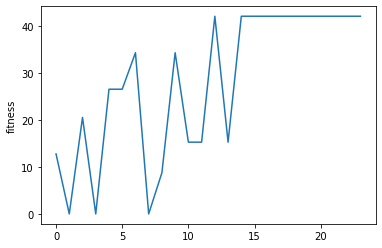

The best weights so far: 8.299999999999999 15.900000000000002 3.0999999999999996 12.75 0.06 1.3600000000000003


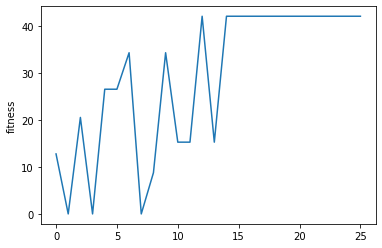

The best weights so far: 8.299999999999999 15.900000000000002 3.0999999999999996 12.75 0.06 1.3600000000000003
End of generation 3----------------------------------------------------------
Training...


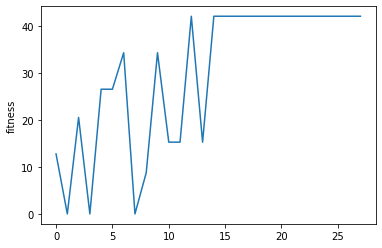

The best weights so far: 8.499999999999998 15.109111984604558 3.590934459031522 13.25 0.1 1.6000000000000005


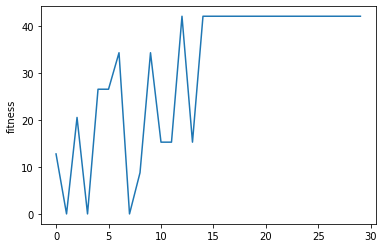

The best weights so far: 8.499999999999998 15.109111984604558 3.590934459031522 13.25 0.1 1.6000000000000005


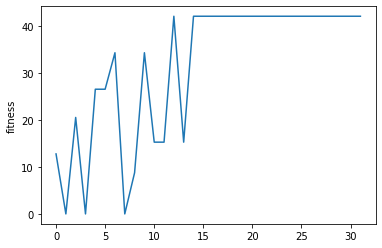

The best weights so far: 8.499999999999998 15.109111984604558 3.590934459031522 13.25 0.1 1.6000000000000005


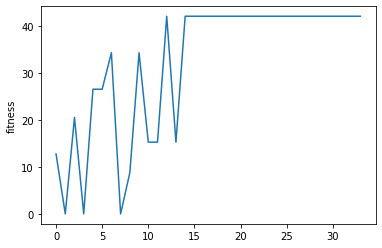

The best weights so far: 8.499999999999998 15.109111984604558 3.590934459031522 13.25 0.1 1.6000000000000005


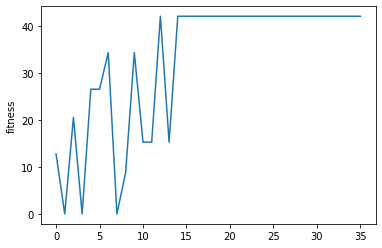

The best weights so far: 8.499999999999998 15.109111984604558 3.590934459031522 13.25 0.1 1.6000000000000005


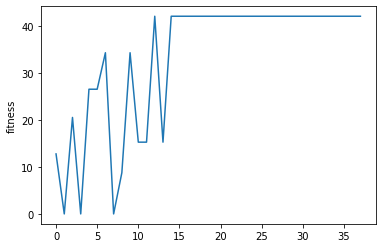

The best weights so far: 8.499999999999998 15.109111984604558 3.590934459031522 13.25 0.1 1.6000000000000005
End of generation 4----------------------------------------------------------
Training...


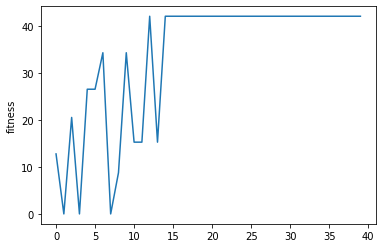

The best weights so far: 8.699999999999998 15.70911198460456 3.429999984673889 12.424292802948457 0.14 2.100971543962391


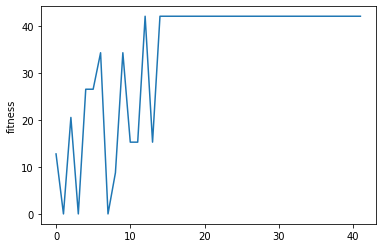

The best weights so far: 8.699999999999998 15.70911198460456 3.429999984673889 12.424292802948457 0.14 2.100971543962391


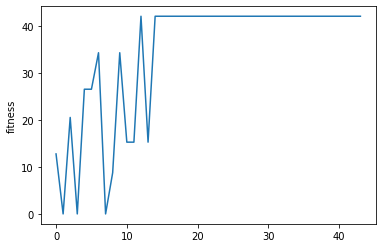

The best weights so far: 8.699999999999998 15.70911198460456 3.429999984673889 12.424292802948457 0.14 2.100971543962391


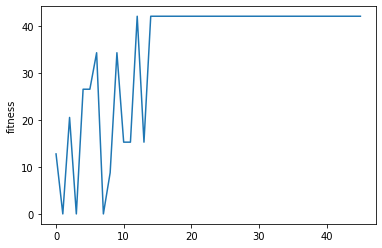

The best weights so far: 8.699999999999998 15.70911198460456 3.429999984673889 12.424292802948457 0.14 2.100971543962391


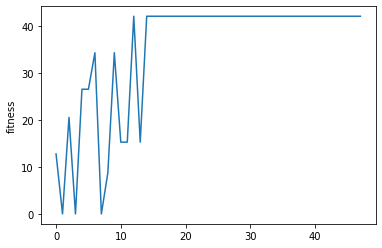

The best weights so far: 8.699999999999998 15.70911198460456 3.429999984673889 12.424292802948457 0.14 2.100971543962391


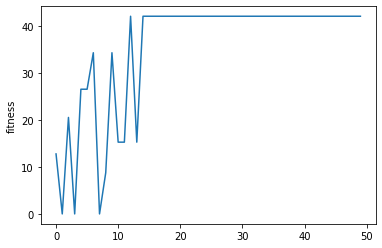

The best weights so far: 8.699999999999998 15.70911198460456 3.429999984673889 12.424292802948457 0.14 2.100971543962391
End of generation 5----------------------------------------------------------
Training...


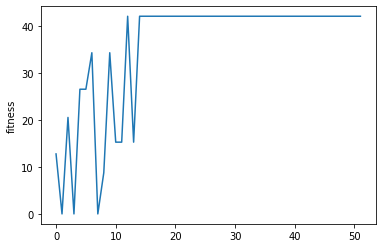

The best weights so far: 8.899999999999997 16.30911198460456 4.829999984673889 12.336029103667153 0.18 3.094518806044097


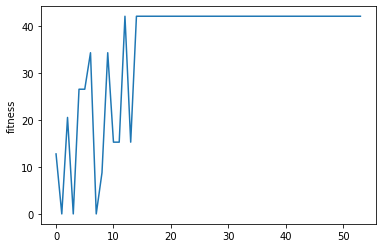

The best weights so far: 8.899999999999997 16.30911198460456 4.829999984673889 12.336029103667153 0.18 3.094518806044097


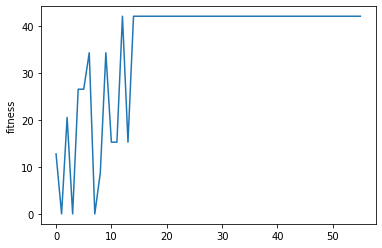

The best weights so far: 8.899999999999997 16.30911198460456 4.829999984673889 12.336029103667153 0.18 3.094518806044097


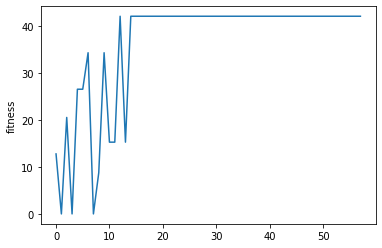

The best weights so far: 8.899999999999997 16.30911198460456 4.829999984673889 12.336029103667153 0.18 3.094518806044097


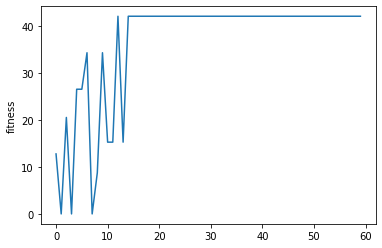

The best weights so far: 8.899999999999997 16.30911198460456 4.829999984673889 12.336029103667153 0.18 3.094518806044097


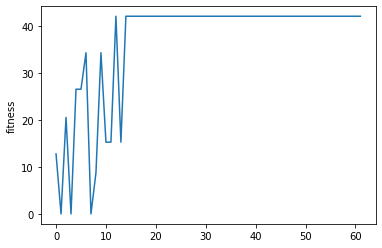

The best weights so far: 8.899999999999997 16.30911198460456 4.829999984673889 12.336029103667153 0.18 3.094518806044097
End of generation 6----------------------------------------------------------
Training...


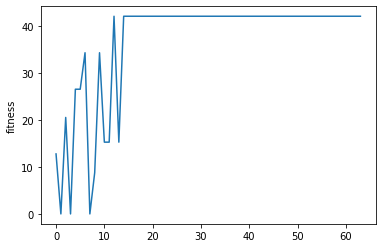

The best weights so far: 9.099999999999996 16.90911198460456 6.229999984673889 12.836029103667153 0.21999999999999997 3.3345188060440973


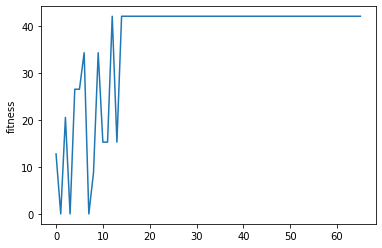

The best weights so far: 9.099999999999996 16.90911198460456 6.229999984673889 12.836029103667153 0.21999999999999997 3.3345188060440973


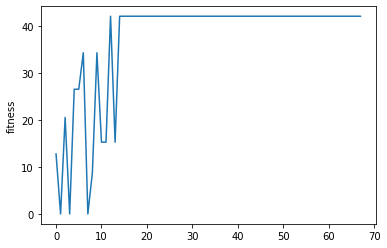

The best weights so far: 9.099999999999996 16.90911198460456 6.229999984673889 12.836029103667153 0.21999999999999997 3.3345188060440973


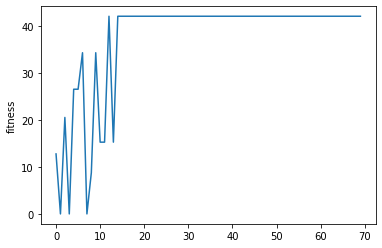

The best weights so far: 9.099999999999996 16.90911198460456 6.229999984673889 12.836029103667153 0.21999999999999997 3.3345188060440973


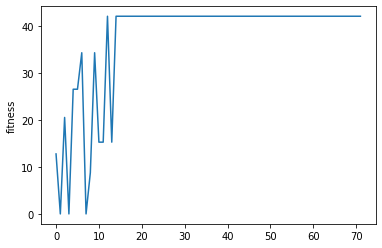

The best weights so far: 9.099999999999996 16.90911198460456 6.229999984673889 12.836029103667153 0.21999999999999997 3.3345188060440973


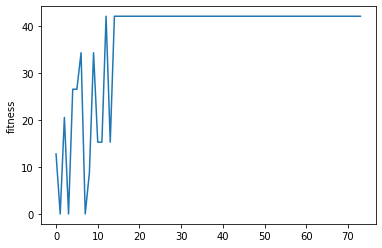

The best weights so far: 9.099999999999996 16.90911198460456 6.229999984673889 12.836029103667153 0.21999999999999997 3.3345188060440973
End of generation 7----------------------------------------------------------
Training...


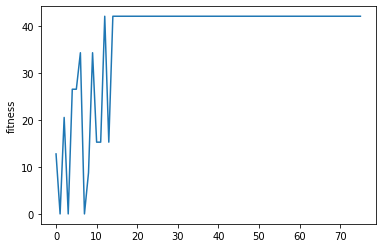

The best weights so far: 9.299999999999995 17.509111984604562 7.62999998467389 13.336029103667153 0.25999999999999995 3.5745188060440976


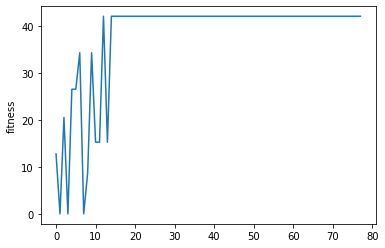

The best weights so far: 9.299999999999995 17.509111984604562 7.62999998467389 13.336029103667153 0.25999999999999995 3.5745188060440976


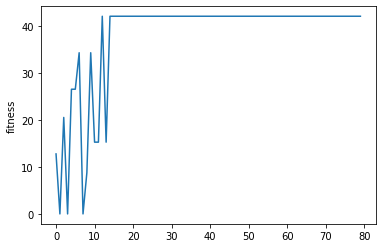

The best weights so far: 9.299999999999995 17.509111984604562 7.62999998467389 13.336029103667153 0.25999999999999995 3.5745188060440976


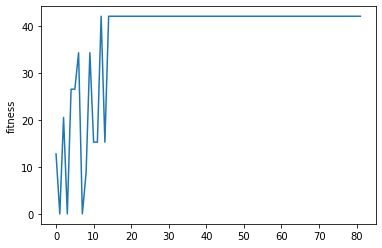

The best weights so far: 9.299999999999995 17.509111984604562 7.62999998467389 13.336029103667153 0.25999999999999995 3.5745188060440976


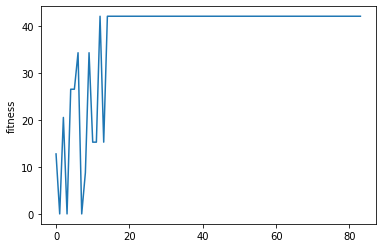

The best weights so far: 9.299999999999995 17.509111984604562 7.62999998467389 13.336029103667153 0.25999999999999995 3.5745188060440976


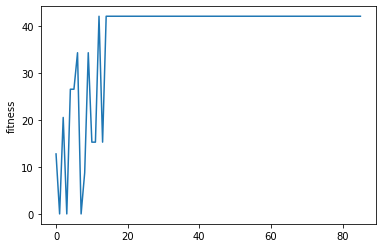

The best weights so far: 9.299999999999995 17.509111984604562 7.62999998467389 13.336029103667153 0.25999999999999995 3.5745188060440976
End of generation 8----------------------------------------------------------
Training...


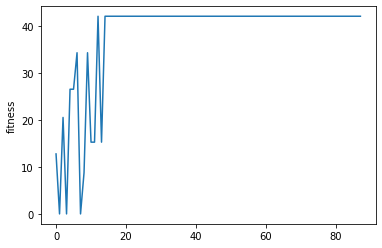

The best weights so far: 9.499999999999995 18.109111984604564 9.02999998467389 13.836029103667153 0.3 3.8145188060440978


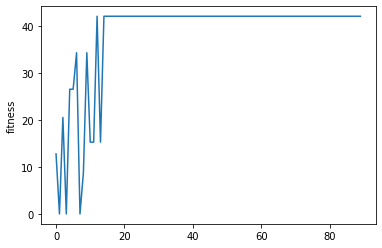

The best weights so far: 9.499999999999995 18.109111984604564 9.02999998467389 13.836029103667153 0.3 3.8145188060440978


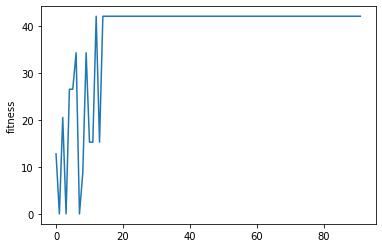

The best weights so far: 9.499999999999995 18.109111984604564 9.02999998467389 13.836029103667153 0.3 3.8145188060440978


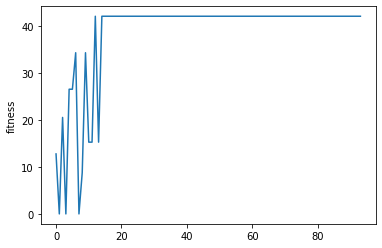

The best weights so far: 9.499999999999995 18.109111984604564 9.02999998467389 13.836029103667153 0.3 3.8145188060440978


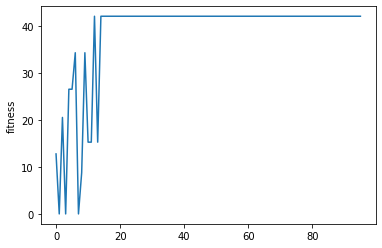

The best weights so far: 9.499999999999995 18.109111984604564 9.02999998467389 13.836029103667153 0.3 3.8145188060440978


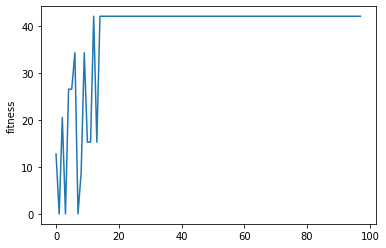

The best weights so far: 9.499999999999995 18.109111984604564 9.02999998467389 13.836029103667153 0.3 3.8145188060440978
End of generation 9----------------------------------------------------------
Training...


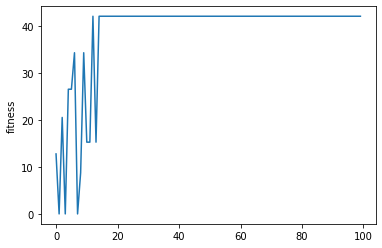

The best weights so far: 9.699999999999994 18.709111984604565 10.429999984673888 14.336029103667153 0.06442222875064484 4.054518806044098


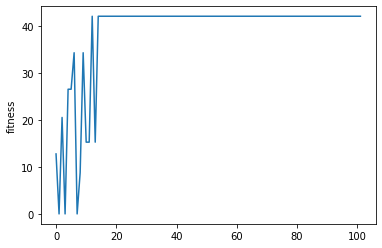

The best weights so far: 9.699999999999994 18.709111984604565 10.429999984673888 14.336029103667153 0.06442222875064484 4.054518806044098


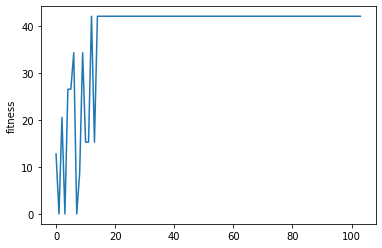

The best weights so far: 9.699999999999994 18.709111984604565 10.429999984673888 14.336029103667153 0.06442222875064484 4.054518806044098


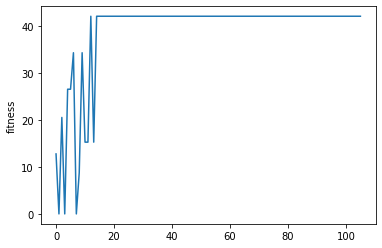

The best weights so far: 9.699999999999994 18.709111984604565 10.429999984673888 14.336029103667153 0.06442222875064484 4.054518806044098


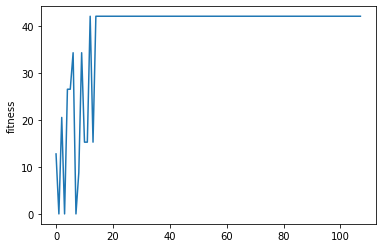

The best weights so far: 9.699999999999994 18.709111984604565 10.429999984673888 14.336029103667153 0.06442222875064484 4.054518806044098


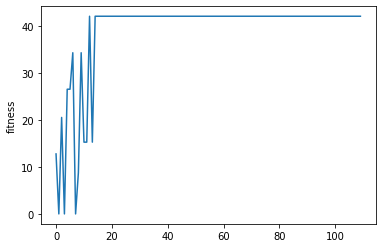

The best weights so far: 9.699999999999994 18.709111984604565 10.429999984673888 14.336029103667153 0.06442222875064484 4.054518806044098
End of generation 10----------------------------------------------------------
Training...


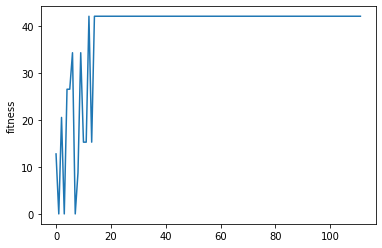

The best weights so far: 9.899999999999993 19.309111984604566 11.829999984673886 14.836029103667153 0.9573431556406244 4.243651530010892


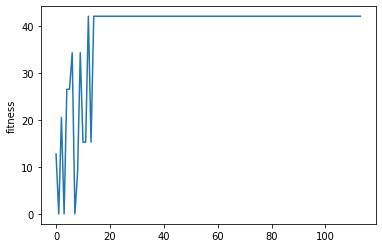

The best weights so far: 9.899999999999993 19.309111984604566 11.829999984673886 14.836029103667153 0.9573431556406244 4.243651530010892


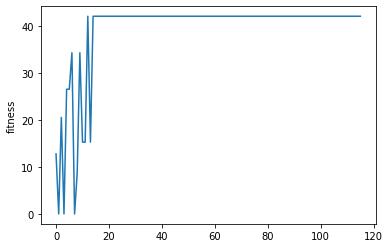

The best weights so far: 9.899999999999993 19.309111984604566 11.829999984673886 14.836029103667153 0.9573431556406244 4.243651530010892


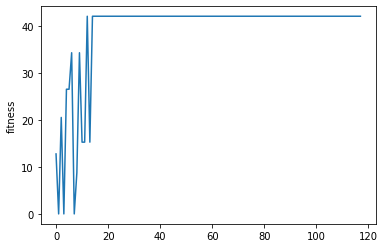

The best weights so far: 9.899999999999993 19.309111984604566 11.829999984673886 14.836029103667153 0.9573431556406244 4.243651530010892


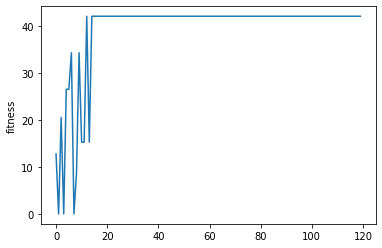

The best weights so far: 9.899999999999993 19.309111984604566 11.829999984673886 14.836029103667153 0.9573431556406244 4.243651530010892


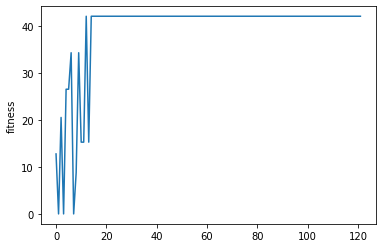

The best weights so far: 9.899999999999993 19.309111984604566 11.829999984673886 14.836029103667153 0.9573431556406244 4.243651530010892
End of generation 11----------------------------------------------------------
Training...


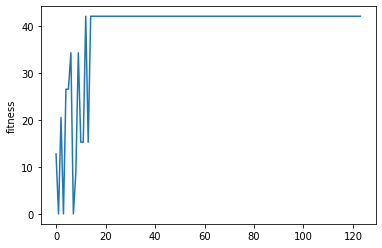

The best weights so far: 10.099999999999993 19.685739961582097 11.22931956832392 15.336029103667153 0.9973431556406245 4.483651530010892


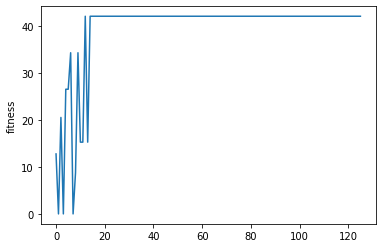

The best weights so far: 10.099999999999993 19.685739961582097 11.22931956832392 15.336029103667153 0.9973431556406245 4.483651530010892


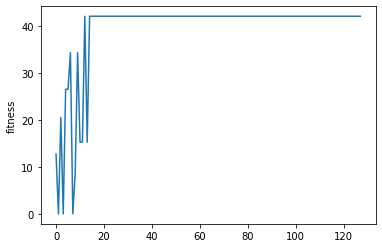

The best weights so far: 10.099999999999993 19.685739961582097 11.22931956832392 15.336029103667153 0.9973431556406245 4.483651530010892


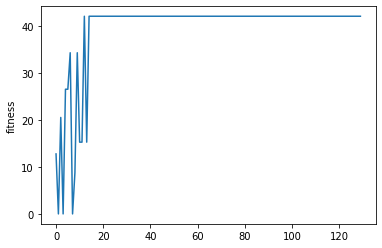

The best weights so far: 10.099999999999993 19.685739961582097 11.22931956832392 15.336029103667153 0.9973431556406245 4.483651530010892


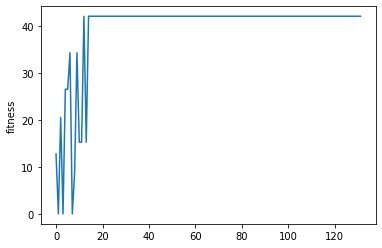

The best weights so far: 10.099999999999993 19.685739961582097 11.22931956832392 15.336029103667153 0.9973431556406245 4.483651530010892


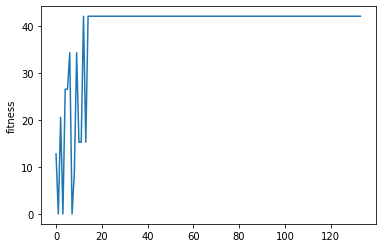

The best weights so far: 10.099999999999993 19.685739961582097 11.22931956832392 15.336029103667153 0.9973431556406245 4.483651530010892
End of generation 12----------------------------------------------------------
Training...


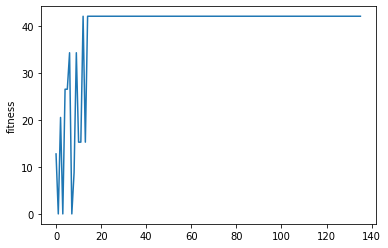

The best weights so far: 10.299999999999992 20.2857399615821 12.070598268178635 15.832832387145325 1.0373431556406245 4.723651530010892


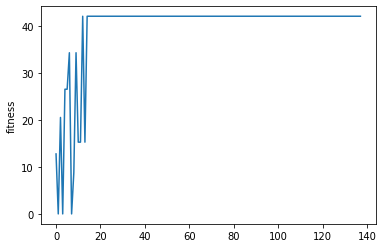

The best weights so far: 10.299999999999992 20.2857399615821 12.070598268178635 15.832832387145325 1.0373431556406245 4.723651530010892


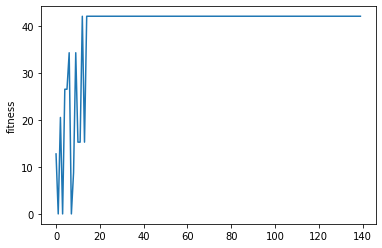

The best weights so far: 10.299999999999992 20.2857399615821 12.070598268178635 15.832832387145325 1.0373431556406245 4.723651530010892


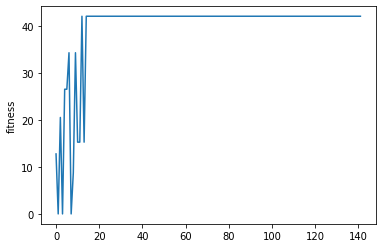

The best weights so far: 10.299999999999992 20.2857399615821 12.070598268178635 15.832832387145325 1.0373431556406245 4.723651530010892


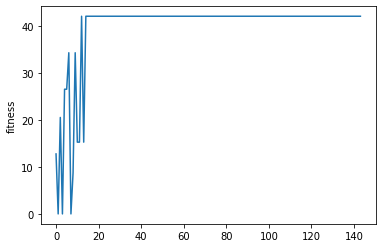

The best weights so far: 10.299999999999992 20.2857399615821 12.070598268178635 15.832832387145325 1.0373431556406245 4.723651530010892


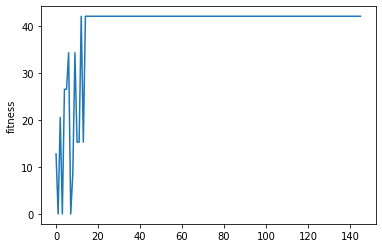

The best weights so far: 10.299999999999992 20.2857399615821 12.070598268178635 15.832832387145325 1.0373431556406245 4.723651530010892
End of generation 13----------------------------------------------------------
Training...


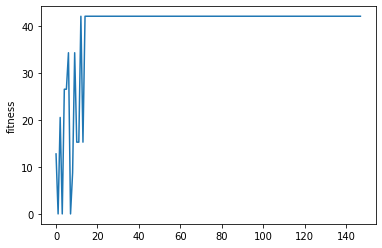

The best weights so far: 10.499999999999991 20.8857399615821 13.470598268178634 16.529755290251128 1.0773431556406246 4.9636515300108925


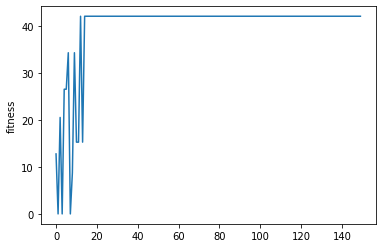

The best weights so far: 10.499999999999991 20.8857399615821 13.470598268178634 16.529755290251128 1.0773431556406246 4.9636515300108925


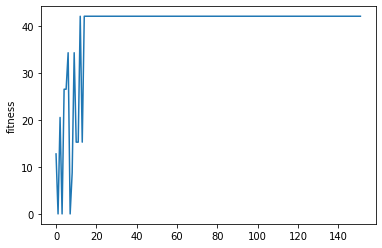

The best weights so far: 10.499999999999991 20.8857399615821 13.470598268178634 16.529755290251128 1.0773431556406246 4.9636515300108925


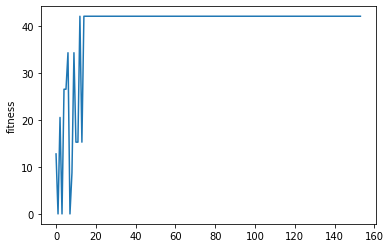

The best weights so far: 10.499999999999991 20.8857399615821 13.470598268178634 16.529755290251128 1.0773431556406246 4.9636515300108925


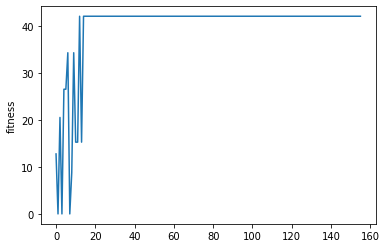

The best weights so far: 10.499999999999991 20.8857399615821 13.470598268178634 16.529755290251128 1.0773431556406246 4.9636515300108925


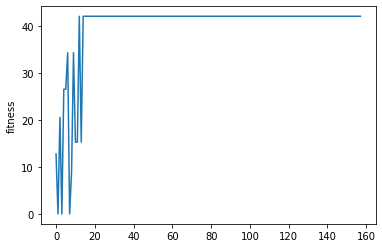

The best weights so far: 10.499999999999991 20.8857399615821 13.470598268178634 16.529755290251128 1.0773431556406246 4.9636515300108925
End of generation 14----------------------------------------------------------
Training...


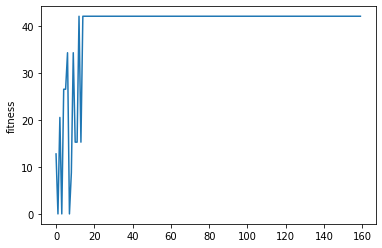

The best weights so far: 10.69999999999999 21.4857399615821 14.870598268178632 17.029755290251128 -0.340722352924405 5.203651530010893


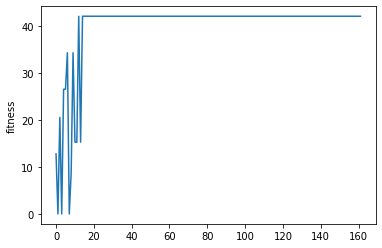

The best weights so far: 10.69999999999999 21.4857399615821 14.870598268178632 17.029755290251128 -0.340722352924405 5.203651530010893


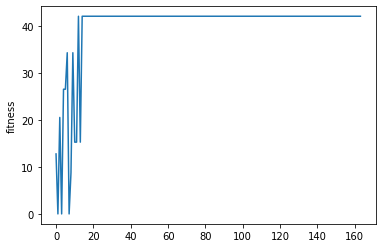

The best weights so far: 10.69999999999999 21.4857399615821 14.870598268178632 17.029755290251128 -0.340722352924405 5.203651530010893


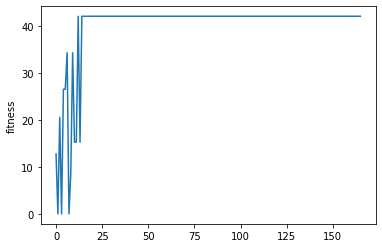

The best weights so far: 10.69999999999999 21.4857399615821 14.870598268178632 17.029755290251128 -0.340722352924405 5.203651530010893


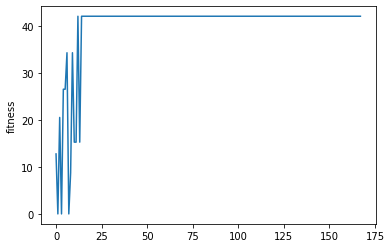

The best weights so far: 10.69999999999999 21.4857399615821 14.870598268178632 17.029755290251128 -0.340722352924405 5.203651530010893


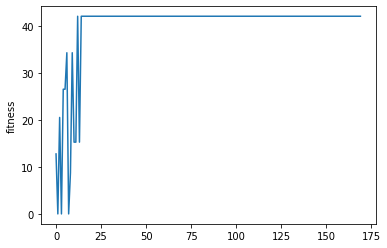

The best weights so far: 10.69999999999999 21.4857399615821 14.870598268178632 17.029755290251128 -0.340722352924405 5.203651530010893
End of generation 15----------------------------------------------------------
Training...


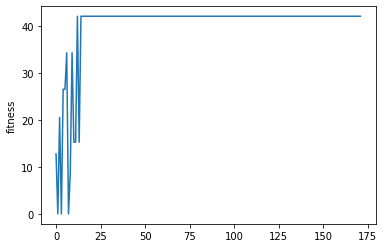

The best weights so far: 11.038542710376667 22.085739961582103 16.27059826817863 17.529755290251128 -0.30072235292440497 5.443651530010893


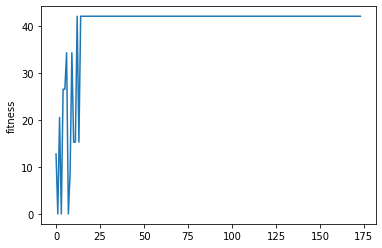

The best weights so far: 11.038542710376667 22.085739961582103 16.27059826817863 17.529755290251128 -0.30072235292440497 5.443651530010893


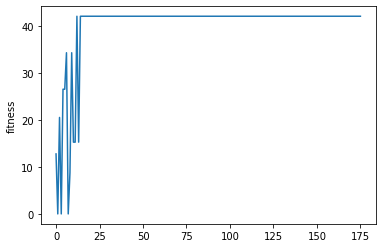

The best weights so far: 11.038542710376667 22.085739961582103 16.27059826817863 17.529755290251128 -0.30072235292440497 5.443651530010893


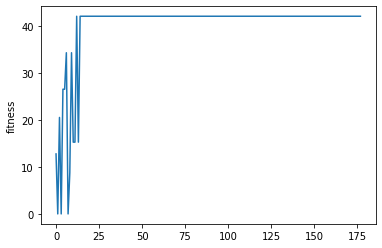

The best weights so far: 11.038542710376667 22.085739961582103 16.27059826817863 17.529755290251128 -0.30072235292440497 5.443651530010893


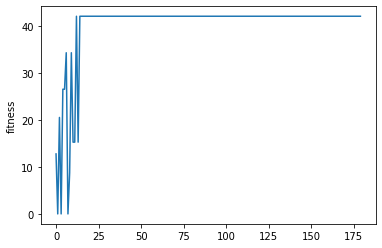

The best weights so far: 11.038542710376667 22.085739961582103 16.27059826817863 17.529755290251128 -0.30072235292440497 5.443651530010893


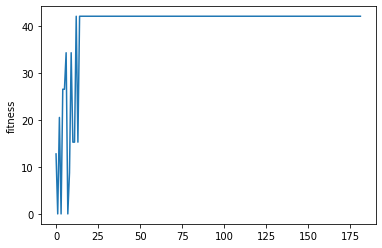

The best weights so far: 11.038542710376667 22.085739961582103 16.27059826817863 17.529755290251128 -0.30072235292440497 5.443651530010893
End of generation 16----------------------------------------------------------
Training...


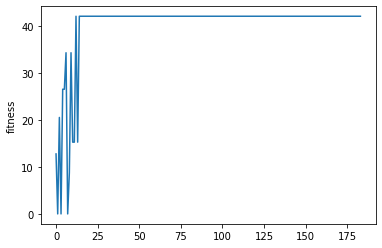

The best weights so far: 11.238542710376667 23.83085004225966 16.16021617341261 17.64982473527995 -0.7500109767068404 5.683651530010893


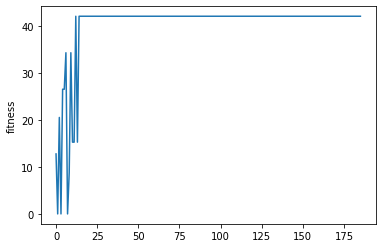

The best weights so far: 11.238542710376667 23.83085004225966 16.16021617341261 17.64982473527995 -0.7500109767068404 5.683651530010893


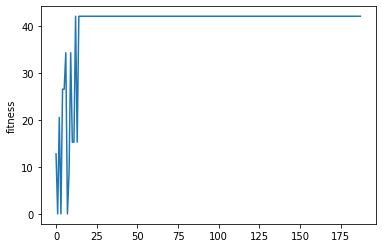

The best weights so far: 11.238542710376667 23.83085004225966 16.16021617341261 17.64982473527995 -0.7500109767068404 5.683651530010893


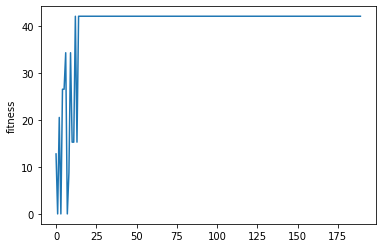

The best weights so far: 11.238542710376667 23.83085004225966 16.16021617341261 17.64982473527995 -0.7500109767068404 5.683651530010893


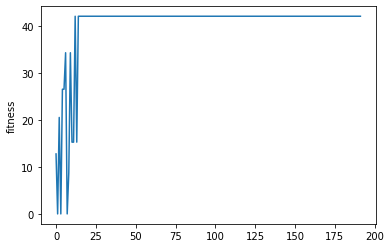

The best weights so far: 11.238542710376667 23.83085004225966 16.16021617341261 17.64982473527995 -0.7500109767068404 5.683651530010893


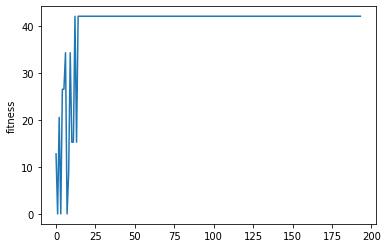

The best weights so far: 11.238542710376667 23.83085004225966 16.16021617341261 17.64982473527995 -0.7500109767068404 5.683651530010893
End of generation 17----------------------------------------------------------
Training...


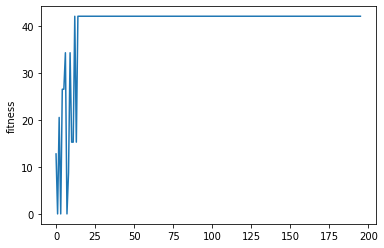

The best weights so far: 11.438542710376666 24.43085004225966 17.56021617341261 18.14982473527995 -1.566914535947146 4.507278858010865


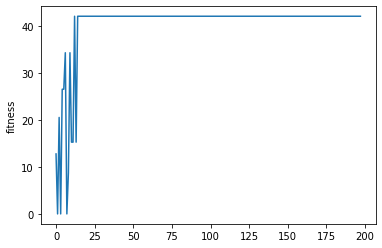

The best weights so far: 11.438542710376666 24.43085004225966 17.56021617341261 18.14982473527995 -1.566914535947146 4.507278858010865


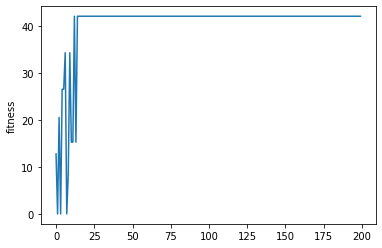

The best weights so far: 11.438542710376666 24.43085004225966 17.56021617341261 18.14982473527995 -1.566914535947146 4.507278858010865


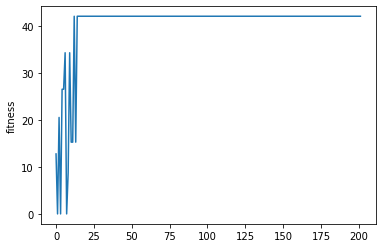

The best weights so far: 11.438542710376666 24.43085004225966 17.56021617341261 18.14982473527995 -1.566914535947146 4.507278858010865


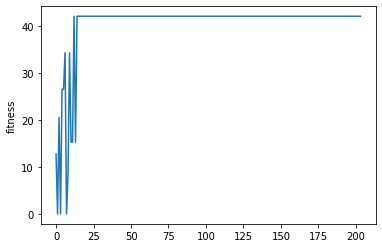

The best weights so far: 11.438542710376666 24.43085004225966 17.56021617341261 18.14982473527995 -1.566914535947146 4.507278858010865


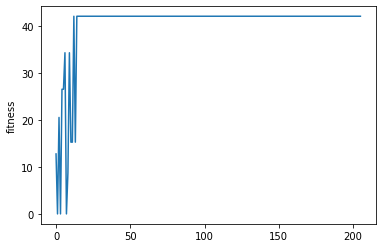

The best weights so far: 11.438542710376666 24.43085004225966 17.56021617341261 18.14982473527995 -1.566914535947146 4.507278858010865
End of generation 18----------------------------------------------------------
Training...


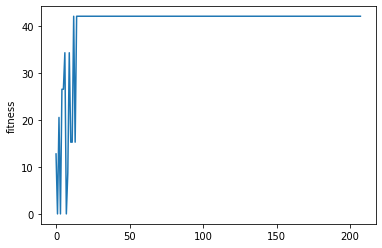

The best weights so far: 11.638542710376665 25.03085004225966 18.960216173412608 18.64982473527995 -1.5269145359471459 4.747278858010866


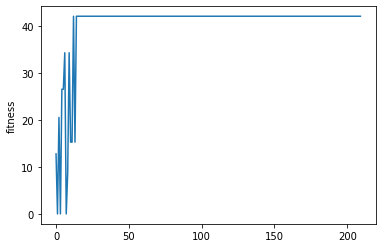

The best weights so far: 11.638542710376665 25.03085004225966 18.960216173412608 18.64982473527995 -1.5269145359471459 4.747278858010866


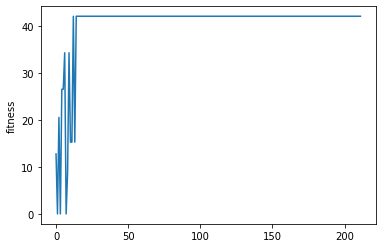

The best weights so far: 11.638542710376665 25.03085004225966 18.960216173412608 18.64982473527995 -1.5269145359471459 4.747278858010866


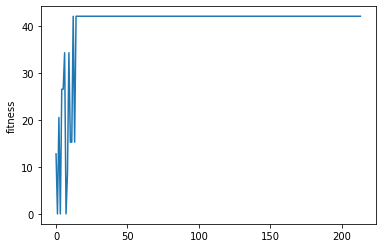

The best weights so far: 11.638542710376665 25.03085004225966 18.960216173412608 18.64982473527995 -1.5269145359471459 4.747278858010866


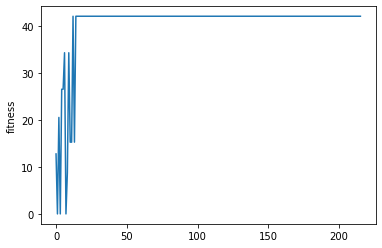

The best weights so far: 11.638542710376665 25.03085004225966 18.960216173412608 18.64982473527995 -1.5269145359471459 4.747278858010866


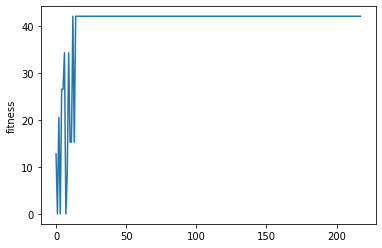

The best weights so far: 11.638542710376665 25.03085004225966 18.960216173412608 18.64982473527995 -1.5269145359471459 4.747278858010866
End of generation 19----------------------------------------------------------
Training...


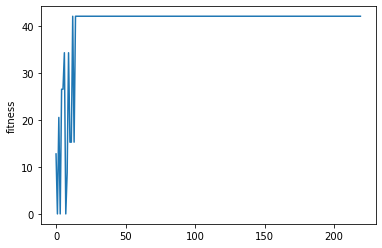

The best weights so far: 11.838542710376665 25.630850042259663 20.360216173412606 19.14982473527995 -0.3616637219449699 4.987278858010866


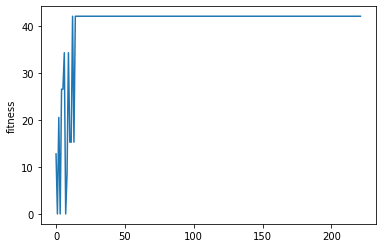

The best weights so far: 11.838542710376665 25.630850042259663 20.360216173412606 19.14982473527995 -0.3616637219449699 4.987278858010866


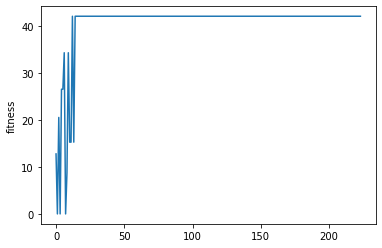

The best weights so far: 11.838542710376665 25.630850042259663 20.360216173412606 19.14982473527995 -0.3616637219449699 4.987278858010866


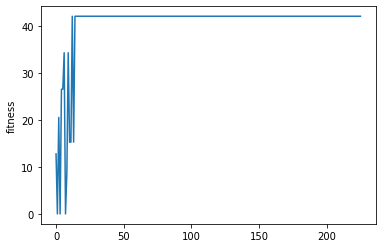

The best weights so far: 11.838542710376665 25.630850042259663 20.360216173412606 19.14982473527995 -0.3616637219449699 4.987278858010866


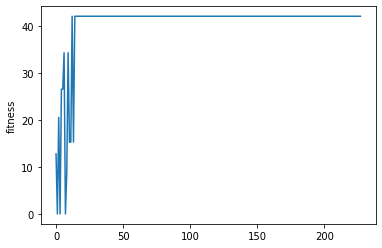

The best weights so far: 11.838542710376665 25.630850042259663 20.360216173412606 19.14982473527995 -0.3616637219449699 4.987278858010866


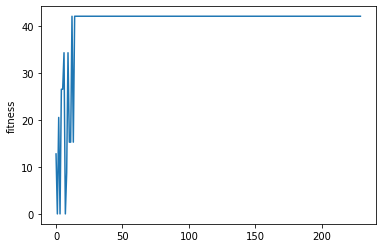

The best weights so far: 11.838542710376665 25.630850042259663 20.360216173412606 19.14982473527995 -0.3616637219449699 4.987278858010866
End of generation 20----------------------------------------------------------
Training...


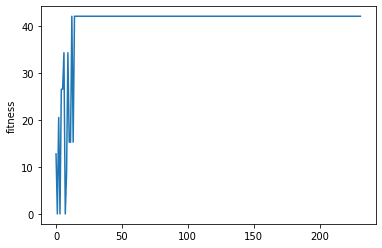

The best weights so far: 12.579631366005312 26.230850042259664 21.760216173412605 19.64982473527995 -0.32166372194496984 5.227278858010866


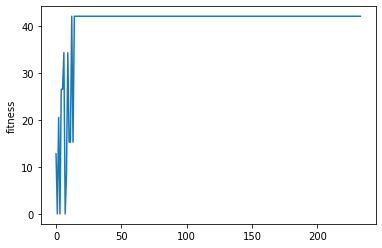

The best weights so far: 12.579631366005312 26.230850042259664 21.760216173412605 19.64982473527995 -0.32166372194496984 5.227278858010866


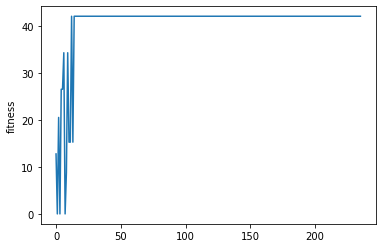

The best weights so far: 12.579631366005312 26.230850042259664 21.760216173412605 19.64982473527995 -0.32166372194496984 5.227278858010866


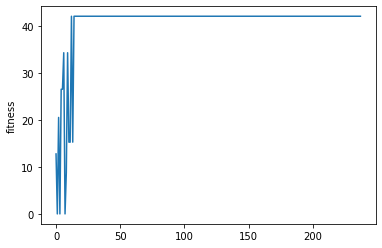

The best weights so far: 12.579631366005312 26.230850042259664 21.760216173412605 19.64982473527995 -0.32166372194496984 5.227278858010866


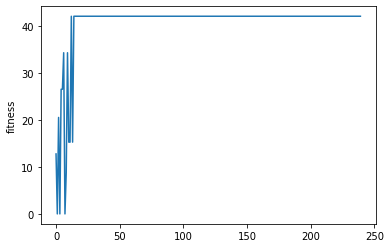

The best weights so far: 12.579631366005312 26.230850042259664 21.760216173412605 19.64982473527995 -0.32166372194496984 5.227278858010866


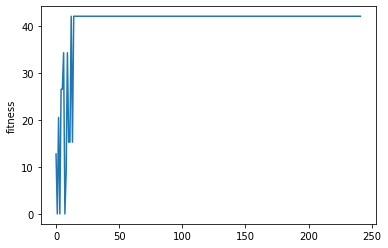

The best weights so far: 12.579631366005312 26.230850042259664 21.760216173412605 19.64982473527995 -0.32166372194496984 5.227278858010866
End of generation 21----------------------------------------------------------
Training...


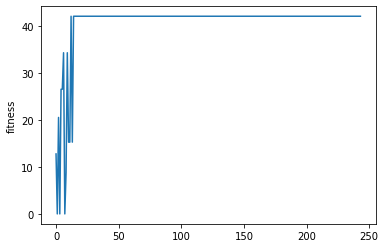

The best weights so far: 12.554439188292466 26.830850042259666 23.160216173412604 20.14982473527995 -0.2816637219449698 5.467278858010866


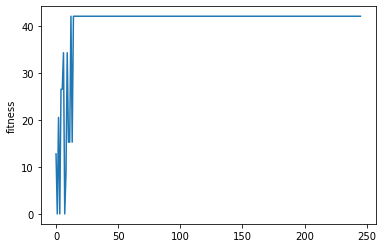

The best weights so far: 12.554439188292466 26.830850042259666 23.160216173412604 20.14982473527995 -0.2816637219449698 5.467278858010866


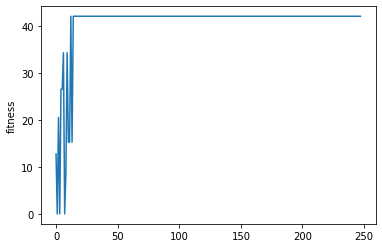

The best weights so far: 12.554439188292466 26.830850042259666 23.160216173412604 20.14982473527995 -0.2816637219449698 5.467278858010866


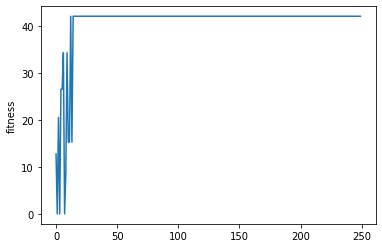

The best weights so far: 12.554439188292466 26.830850042259666 23.160216173412604 20.14982473527995 -0.2816637219449698 5.467278858010866


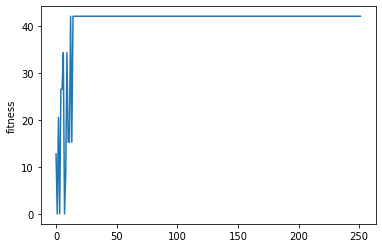

The best weights so far: 12.554439188292466 26.830850042259666 23.160216173412604 20.14982473527995 -0.2816637219449698 5.467278858010866


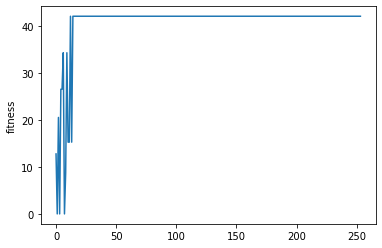

The best weights so far: 12.554439188292466 26.830850042259666 23.160216173412604 20.14982473527995 -0.2816637219449698 5.467278858010866
End of generation 22----------------------------------------------------------
Training...


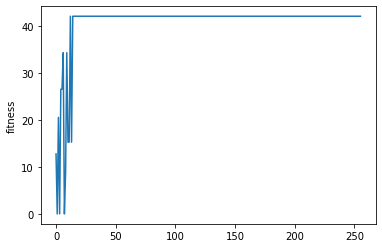

The best weights so far: 12.754439188292466 27.430850042259667 24.560216173412602 20.64982473527995 -0.2416637219449698 5.707278858010866


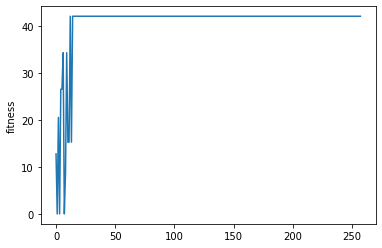

The best weights so far: 12.754439188292466 27.430850042259667 24.560216173412602 20.64982473527995 -0.2416637219449698 5.707278858010866


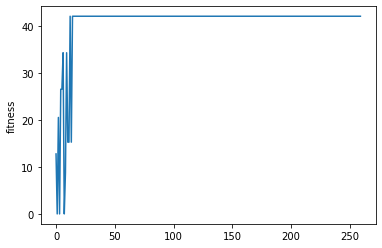

The best weights so far: 12.754439188292466 27.430850042259667 24.560216173412602 20.64982473527995 -0.2416637219449698 5.707278858010866


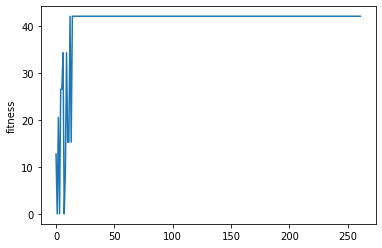

The best weights so far: 12.754439188292466 27.430850042259667 24.560216173412602 20.64982473527995 -0.2416637219449698 5.707278858010866


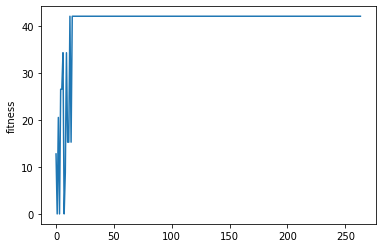

The best weights so far: 12.754439188292466 27.430850042259667 24.560216173412602 20.64982473527995 -0.2416637219449698 5.707278858010866


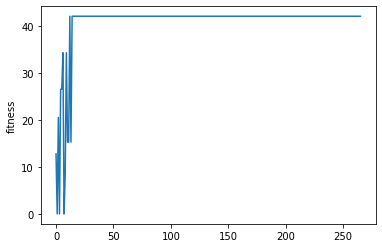

The best weights so far: 12.754439188292466 27.430850042259667 24.560216173412602 20.64982473527995 -0.2416637219449698 5.707278858010866
End of generation 23----------------------------------------------------------
Training...


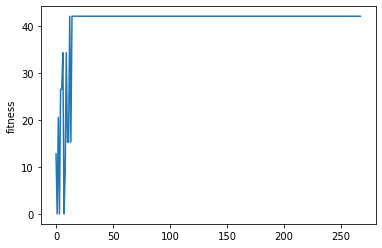

The best weights so far: 14.52110417589102 28.03085004225967 25.9602161734126 21.14982473527995 -0.20166372194496981 5.947278858010867


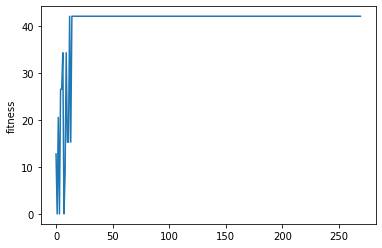

The best weights so far: 14.52110417589102 28.03085004225967 25.9602161734126 21.14982473527995 -0.20166372194496981 5.947278858010867


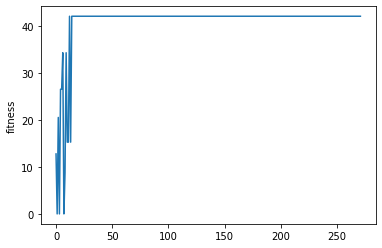

The best weights so far: 14.52110417589102 28.03085004225967 25.9602161734126 21.14982473527995 -0.20166372194496981 5.947278858010867


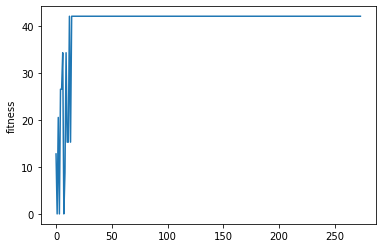

The best weights so far: 14.52110417589102 28.03085004225967 25.9602161734126 21.14982473527995 -0.20166372194496981 5.947278858010867


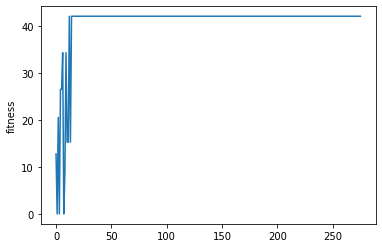

The best weights so far: 14.52110417589102 28.03085004225967 25.9602161734126 21.14982473527995 -0.20166372194496981 5.947278858010867


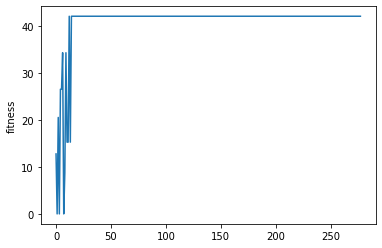

The best weights so far: 14.52110417589102 28.03085004225967 25.9602161734126 21.14982473527995 -0.20166372194496981 5.947278858010867
End of generation 24----------------------------------------------------------
Training...


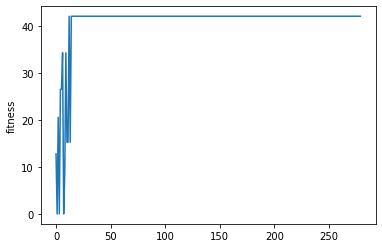

The best weights so far: 14.72110417589102 26.5421304563124 27.3602161734126 21.64982473527995 -0.16166372194496983 6.187278858010867


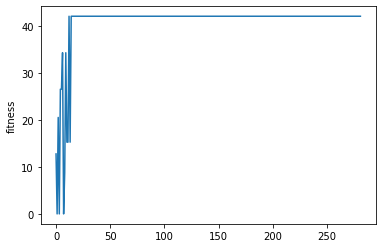

The best weights so far: 14.72110417589102 26.5421304563124 27.3602161734126 21.64982473527995 -0.16166372194496983 6.187278858010867


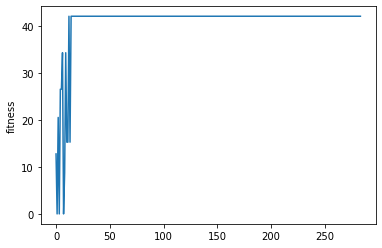

The best weights so far: 14.72110417589102 26.5421304563124 27.3602161734126 21.64982473527995 -0.16166372194496983 6.187278858010867


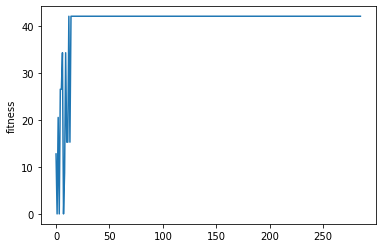

The best weights so far: 14.72110417589102 26.5421304563124 27.3602161734126 21.64982473527995 -0.16166372194496983 6.187278858010867


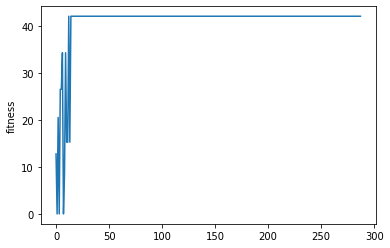

The best weights so far: 14.72110417589102 26.5421304563124 27.3602161734126 21.64982473527995 -0.16166372194496983 6.187278858010867


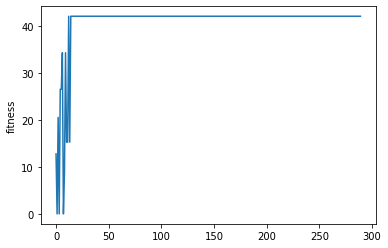

The best weights so far: 14.72110417589102 26.5421304563124 27.3602161734126 21.64982473527995 -0.16166372194496983 6.187278858010867
End of generation 25----------------------------------------------------------
Training...


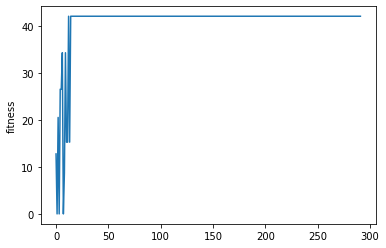

The best weights so far: 14.921104175891019 27.1421304563124 28.760216173412598 22.14982473527995 -0.6190647084345196 4.7494368288368145


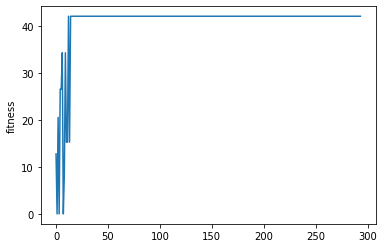

The best weights so far: 14.921104175891019 27.1421304563124 28.760216173412598 22.14982473527995 -0.6190647084345196 4.7494368288368145


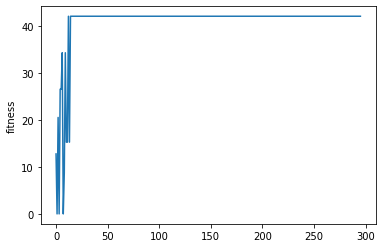

The best weights so far: 14.921104175891019 27.1421304563124 28.760216173412598 22.14982473527995 -0.6190647084345196 4.7494368288368145


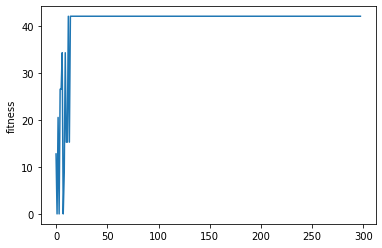

The best weights so far: 14.921104175891019 27.1421304563124 28.760216173412598 22.14982473527995 -0.6190647084345196 4.7494368288368145


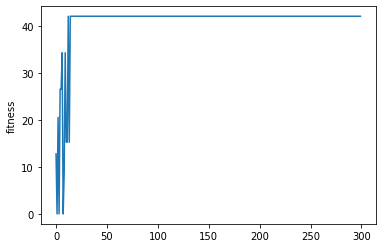

The best weights so far: 14.921104175891019 27.1421304563124 28.760216173412598 22.14982473527995 -0.6190647084345196 4.7494368288368145


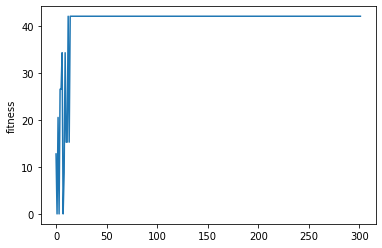

The best weights so far: 14.921104175891019 27.1421304563124 28.760216173412598 22.14982473527995 -0.6190647084345196 4.7494368288368145
End of generation 26----------------------------------------------------------
Training...


KeyboardInterrupt: ignored

In [7]:
# An Evolutionary Approach to optimize the weights (ง'̀-'́)ง
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
from itertools import combinations
import random 

def plot_fitness(fitness):
    plt.plot(fitness)
    plt.ylabel('fitness')
    plt.show(block=True)
    plt.interactive(False)

#The fitness function evaluate the performance of each brain
def fitness(fitness_brain1,fitness_brain2,win_cost_brain1,win_cost_brain2,cost,parent_brains):
    s = (cost) * (parent_brains - 1)
    fitness_brain1 += (win_cost_brain1**2)/s
    fitness_brain2 += (win_cost_brain2**2)/s
    return fitness_brain1,fitness_brain2

'''
w_1 # length 3 with 1 open end 
w_2 # length 3 with 2 open ends
w_3 # length 2 with 1 open end
w_4 # length 2 with 2 open ends---->attack
w_5 # length 1 with 1 open end
w_6 # length 1 with 2 open ends
Note that the player can be strengthened by adding more w_i   
'''

# The crossover function swaps the wights of two brains regarding the crossover_rate
def crossover(brain1,brain2,rate):
    if np.random.randint(0, 1 / rate) == 1: brain1.w_1, brain2.w_1 = brain2.w_1, brain1.w_1
    if np.random.randint(0, 1 / rate) == 1: brain1.w_2, brain2.w_2 = brain2.w_2, brain1.w_2
    if np.random.randint(0, 1 / rate) == 1: brain1.w_3, brain2.w_3 = brain2.w_3, brain1.w_3
    if np.random.randint(0, 1 / rate) == 1: brain1.w_4, brain2.w_4 = brain2.w_4, brain1.w_4
    if np.random.randint(0, 1 / rate) == 1: brain1.w_5, brain2.w_5 = brain2.w_5, brain1.w_5
    if np.random.randint(0, 1 / rate) == 1: brain1.w_6, brain2.w_6 = brain2.w_6, brain1.w_6
    # ave = (brain1.fitness + brain2.fitness)/2
    # brain1.fitness = brain2.fitness = ave
    return brain1,brain2

# The mutation function slightly adjusts the weights
def mutation(brain, stable_rate): # epsilon greedy decision
    # ~1:stable ~0:unstable
    if random.random() < stable_rate: brain.w_1 += 0.1
    else:brain.w_1 += np.random.normal(0,1)# add a normally distributed noise to the weights
    if random.random() < stable_rate: brain.w_2 += 0.3
    else:brain.w_2 += np.random.normal(0,1)
    if random.random() < stable_rate: brain.w_3 += 0.7
    else:brain.w_3 += np.random.normal(0,1)
    if random.random() < stable_rate: brain.w_4 += 0.25
    else:brain.w_4 += np.random.normal(0,1)
    if random.random() < stable_rate: brain.w_5 += 0.02
    else:brain.w_5 += np.random.normal(0,1)
    if random.random() < stable_rate: brain.w_6 += 0.12
    else:brain.w_6 += np.random.normal(0,1)
    return brain

# Initialize two brains and assign random weights to them
def brain_init(parent_brains):
    brains = []
    for _ in range(parent_brains):
        w = Weights()
        w.w_1 = np.random.randint(8, 12)
        w.w_2 = np.random.randint(15, 20)
        w.w_3 = np.random.randint(0, 10)
        w.w_4 = np.random.randint(10, 15)
        w.w_5 = np.random.randint(0, 5)
        w.w_6 = np.random.randint(0, 5)
        brains.append(w)
    return brains

# arguments are 2 weight classes
def find_winner(weights_x, weights_o):
    player_1 = 'x'
    player_2 = 'o'

    board, winner = compare_weights(weights_x, weights_o)

    if winner == player_1:
        weight_winner = weights_x
    elif winner == player_2:
        weight_winner = weights_o
    else:  # tie game
        weight_winner = random.choice([weights_x, weights_o])

    winner_move = 0
    win1_move = 0
    win2_move = 0
    num_moves_x, num_moves_o = 0, 0
    for i in range(0, board.shape[0]):
        for j in range(0, board.shape[1]):
            if board[i][j] == player_1:
                num_moves_x += 1
            elif board[i][j] == player_2:
                num_moves_o += 1

    winner_move = num_moves_x if winner == player_1 else num_moves_o
    win1_move = num_moves_x if winner == player_1 else 0
    win2_move = num_moves_o if winner == player_2 else 0
    return weight_winner, num_moves_x, num_moves_o, winner_move, win1_move, win2_move

# Select two strong brains as parents and the weakest brain as elimination
def selection(brain_list,mode):# mode = elimination or parent
    f_list = []
    for i in brain_list:
        f_list.append(i.fitness)
    if mode == "p":
        p1,p2 = sorted(range(len(f_list)), key=lambda i: f_list[i], reverse=True)[:2]
        return brain_list[p1],brain_list[p2]
    if mode == "e":
        e = sorted(range(len(f_list)), key=lambda i: f_list[i], reverse=False)[:1]
        return brain_list[e[0]]

# This function returns the best weights so far
def optimal_weights(brain_list,fitness_list):
    max_value = max(fitness_list)
    max_index = fitness_list.index(max_value)
    return brain_list[max_index]

def train():
    print(device_lib.list_local_devices())
    generation = 0 # number of generations
    parent_brains = 2 # init search space
    crossover_rate = 0.5
    mutation_stable_rate = 0.9
    fitness_track = [] # track all the fitness value so far
    brain_track = [] # track all the brains in history

    brains = brain_init(parent_brains)  # a list of random brains
    population = brains
    while generation < 50:
        pairs = list(combinations(population, 2))  # a list of tuples i.e [(a,b),(b,c),(a,c)]
        print("Training...")
        # update fitness value for each weights
        for i in pairs:
            i = list(i)

            # win1: total number of moves in the games won by brain1
            # win2: total number of moves in the games won by brain2
            # cost: total number of moves in all the games
            x,y,z,win,win1,win2 = find_winner(i[0],i[1]) # weight_winner, num_moves_x, num_moves_o, winner_move
            cost = y + z
            f1,f2 = fitness(i[0].fitness,i[1].fitness,win1,win2,cost,parent_brains)
            i[0].fitness,i[1].fitness = f1,f2
            fitness_track.append(i[0].fitness)
            fitness_track.append(i[1].fitness)
            brain_track.append(i[0])
            brain_track.append(i[1])
            plot_fitness(fitness_track)
            best = optimal_weights(brain_track, fitness_track)
            print("The best weights so far:", best.w_1, best.w_2, best.w_3, best.w_4, best.w_5, best.w_6)

        # Evolution start
        p1,p2 = selection(population,"p") # best two brains
        child1,child2 = crossover(p1,p2,crossover_rate)
        child1 = mutation(child1,mutation_stable_rate)
        child2 = mutation(child2,mutation_stable_rate)

        population.append(child1)
        population.append(child2)

        while len(population) > 4:
            e = selection(population, "e")# worst brain
            population.remove(e)
        # one generation ended
        generation += 1
        print("End of generation "+str(generation)+"----------------------------------------------------------")

train()
